# Q-1.1: Word Frequency Analysis

Girdi olarak bir text alan, çıktı olarak da text içerisinde yer alan ayrık string yapılarının her birinin kaç defa listede bulunduğunu (kelime, tekrar sayısı) tuple yapısında tutan ve bütün bu tupleları bir liste şeklinde döndüren bir fonksiyon yazınız. Fonksiyon ismi: **word_frequency_analysis**

Fonksiyona örnek girdi ve çıktı aşağıdaki gibidir:

--> text = "apple banana orange apple banana apple"

--> result = word_frequency_analysis(text)

--> print(result)

[('apple', 3), ('banana', 2), ('orange', 1)]

Bu örnekte 'apple' stringi 3 kez, 'banana' stringi iki kez 'orange' stringi de bir kez tekrar etmiştir.

*Kısıtlar:*
- Girdi olan veri yalnızca küçük harflerle yazılı kelimeleri ve kelimeler arasında birer boşluğu barındıran haldedir.
- Çıktı verisi yalnızca kelimeleri ve tekrar sayılarını içeren ve tekrar sayılarına göre azalacak şekilde sıralanmış bir liste şeklinde olmalıdır. Eğer tekrar sayıları aynı ise alfabetik sıralanmalıdır.

*Trick:*
Bu sorunu verimli bir şekilde çözmek için, kelime sıklıklarını saklamak için sözlükleri ve nihai sonucu saklamak için bir liste kullanmayı düşünün. Sözlük, sözcük oluşumlarının sayılmasına yardımcı olabilirken, liste, verilen ölçütlere göre sözcük sıklık gruplarını sıralamak için kullanılabilir.


In [ ]:
# @title
def word_frequency_analysis(text):
    # Create an empty dictionary to store word frequencies
    word_freq = {}

    # Step 1: Count the occurrences of each word in the text
    words = text.split()
    for word in words:
        print(word, word_freq.get(word, 0))
        word_freq[word] = word_freq.get(word, 0) + 1

    # Step 2: Create a list of tuples containing word and its frequency
    word_freq_list = [(word, freq) for word, freq in word_freq.items()]

    # Step 3: Sort the list based on frequency (descending) and then word (alphabetically)
    word_freq_list.sort(key=lambda x: (-x[1], x[0]))

    return word_freq_list

In [ ]:
text = "apple banana orange apple banana apple avocado avocado avocado"
result = word_frequency_analysis(text)
print(result)  # Output: [('apple', 3), ('banana', 2), ('orange', 1)]

apple 0
banana 0
orange 0
apple 1
banana 1
apple 2
avocado 0
avocado 1
avocado 2
[('apple', 3), ('avocado', 3), ('banana', 2), ('orange', 1)]


# Q-1.2: Index Orderer Problem

Herhangi bir veritabanından liste içerisinde liste olarak basılan, düzensiz bir şekilde gelen bir veri grubunu sınıflamamız gerekmektedir. Sınıflama sonucunda bir sözlük içerisinde liste şeklinde bulunan bir yapı kurularak her verinin hangi indislerden erişilebileceğini ve verinin tipini (type) içeren bir yapıda olmalıdır. Her iç sözlük: 2: [(0, 2), (1, 1), int] yapısında olmalıdır. Son indis hariç veriler (satır, sütun) bilgilerini içerecektir.

İlgili sınıflama problemi rastgele basılan verilere erişim konusunda oluşan güçlüğü veri özelinde çözmeyi amaçlamaktadır. Fonksiyon ismi: **index_orderer**

--> Yazılacak olan fonksiyon girdi olarak bir liste alacak ve çıktı olarak bir sözlük döndürecektir. Örnek girdi ve çıktı aşağıdaki gibidir:

--> liste = [[1, 2, 3.7], [2, 3.7], [1]]

--> result = index_orderer(liste)

--> print(result)

{
    
1: [(2, 0), (0, 0), <class 'int'>],

2: [(1, 0), (0, 1), <class 'int'>],

3.7: [(1, 1), (0, 2), <class 'float'>]

}

**Kısıtlar**. Girdi verisi olarak yalnızca 'string', 'int', 'float' tiplerinin alınabileceğini varsayınız.

**Trick**: Yapıyı kurarken liste içerisinde indeksleme tekniği ile gezin. İndeksleme ile gezerken listede denk gelinen elemanın önceden sözlüğe eklenip eklenmediğini kontrol etmek için bir set() tutabilirsiniz. (Aynı işlemi sözlük anahtarları içerisinde kontrol ederek de yapabilirsiniz.) Sonrasında listenin hangi indeksinde bulunuyorsanız onu listeye ekleyin. Type'ı nasıl ekleyeceğiniz size kalmış :)

isdisjoint()
Bu metodun çok basit bir görevi vardır. isdisjoint() metodunu kullanarak iki kümenin kesişim kümesinin boş olup olmadığı sorgulayabilirsiniz. Hatırlarsanız aynı işi bir önceki bölümde gördüğümüz intersection() metodunu kullanarak da yapabiliyorduk. Ama eğer hayattan tek beklentiniz iki kümenin kesişim kümesinin boş olup olmadığını, yani bu iki kümenin ortak eleman içerip içermediğini öğrenmekse, basitçe isdisjoint() metodundan yararlanabilirsiniz:

a = set([1, 2, 3])

b = set([2, 4, 6])

a.isdisjoint(b)

False

In [ ]:
# @title
def index_orderer(liste):
    occurence_set = set()
    return_dict = {}
    for i, list_elem in enumerate(liste):
        for j, ele in enumerate(list_elem):
            if (occurence_set.isdisjoint(set([ele]))):
                occurence_set.add(ele)
                return_dict[ele] = [(i, j)] # liste = [[1, 2, 3.7], [2, 3.7], [1]]
            else:
                return_dict[ele].append((i,j))
    for ele in list(return_dict.keys()):
        return_dict[ele].sort(key=lambda x: (x[0], x[1]))
        return_dict[ele].append(type(ele))
    return return_dict

In [ ]:
liste = [[1, 2, 3.7, 1], [2, 3.7], [1]]
index_orderer(liste)

{1: [(0, 0), (0, 3), (2, 0), int],
 2: [(0, 1), (1, 0), int],
 3.7: [(0, 2), (1, 1), float]}

In [ ]:
liste = [[1, 2, 3.7], [2, 3.7], [1], ['Feyz'], ['feyz', 6.7]]

In [ ]:
index_orderer(liste)

{1: [(0, 0), (2, 0), int],
 2: [(0, 1), (1, 0), int],
 3.7: [(0, 2), (1, 1), float],
 'Feyz': [(3, 0), str],
 'feyz': [(4, 0), str],
 6.7: [(4, 1), float]}

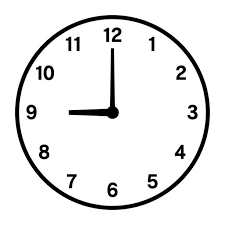

# SAAT AÇI PROBLEMİ

Günün yarım dilimlik her saatinde akrep ve yelkovanın mutlak kuzeye göre açısını ve aralarındaki açı farkını akrepi referans alacak şekilde hesaplayan ve bir sözlük içerisine bunları yazan bir kod yazınız.

Yazacağınız kod 0:00 ve 11:59 saatleri arasındaki tüm saatleri aşağıdaki örnekteki gibi içermelidir.

**Trick:** Mutlak kuzey saatte 12'yi göstermektedir ve mutlak kuzey açısı 0 derecedir. Yelkovan açıları direkt o anki dakikadan hesaplanabilir. Fakat akrep açılarını hesaplarken o anki saati ve dakikayı esas almalısınız.

**Mesela: **Saat 3:10 iken yelkovan 60 dereceyi göstermektedir. Akrep ise 90 derece + (3 ve 4 arasındaki yolun 1/6sı) şeklinde bir açıyı temsil etmelidir.

Aşağıdaki örnekten anlaşılacağı üzere açılar mutlak kuzeyden saat yönüne doğru artmaktadır.

In [ ]:
# SOZLUK TANIMLAMA
hourDegreeDict = {}

# Sozluge eleman ekleme
hourDegreeDict["03:00"]  = {"hourHand": 90,  "minuteHand": 0, "difference": 90}
hourDegreeDict["06:00"]  = {"hourHand": 180, "minuteHand": 0, "difference": 180}
hourDegreeDict["09:00"]  = {"hourHand": 270, "minuteHand": 0, "difference": 270}
hourDegreeDict["00:00"] = {"hourHand": 0,   "minuteHand": 0, "difference": 0}
print(hourDegreeDict)

{'03:00': {'hourHand': 90, 'minuteHand': 0, 'difference': 90}, '06:00': {'hourHand': 180, 'minuteHand': 0, 'difference': 180}, '09:00': {'hourHand': 270, 'minuteHand': 0, 'difference': 270}, '00:00': {'hourHand': 0, 'minuteHand': 0, 'difference': 0}}


In [ ]:
#@title
hourDegreeDictByMinute = {}

for hour in range(12):
    for minute in range(60):
        minuteDegree = minute*6.0                           # minute: 60, degree: 360, degree/minute = 6.0
        hourDegree = (hour*30.0 + minute/2)  % 360.0        # hour: 12, degree 360, degree/hour = 30.0; 1hour degree = 30, minute = 60, 1hour degree / minute = 0.5
        difference = hourDegree - minuteDegree              # get diff every step
        clockHour = str(hour) if hour >= 10 else "0" + str(hour)          # write like: 05, 11
        clockMinute = str(minute) if minute >= 10 else "0" + str(minute)  # same thing
        clock = clockHour + ":" + clockMinute                             # concat hour and minute
        hourDegreeDictByMinute[clock] = {"hourHand":hourDegree, "minuteHand": minuteDegree, "difference": difference} # write into dict

In [ ]:
for key in hourDegreeDictByMinute.keys():
    print(key, ":", hourDegreeDictByMinute[key])

00:00 : {'hourHand': 0.0, 'minuteHand': 0.0, 'difference': 0.0}
00:01 : {'hourHand': 0.5, 'minuteHand': 6.0, 'difference': -5.5}
00:02 : {'hourHand': 1.0, 'minuteHand': 12.0, 'difference': -11.0}
00:03 : {'hourHand': 1.5, 'minuteHand': 18.0, 'difference': -16.5}
00:04 : {'hourHand': 2.0, 'minuteHand': 24.0, 'difference': -22.0}
00:05 : {'hourHand': 2.5, 'minuteHand': 30.0, 'difference': -27.5}
00:06 : {'hourHand': 3.0, 'minuteHand': 36.0, 'difference': -33.0}
00:07 : {'hourHand': 3.5, 'minuteHand': 42.0, 'difference': -38.5}
00:08 : {'hourHand': 4.0, 'minuteHand': 48.0, 'difference': -44.0}
00:09 : {'hourHand': 4.5, 'minuteHand': 54.0, 'difference': -49.5}
00:10 : {'hourHand': 5.0, 'minuteHand': 60.0, 'difference': -55.0}
00:11 : {'hourHand': 5.5, 'minuteHand': 66.0, 'difference': -60.5}
00:12 : {'hourHand': 6.0, 'minuteHand': 72.0, 'difference': -66.0}
00:13 : {'hourHand': 6.5, 'minuteHand': 78.0, 'difference': -71.5}
00:14 : {'hourHand': 7.0, 'minuteHand': 84.0, 'difference': -77.0}


# KARE KONSTRİKSÜYONU PROBLEMİ

İki boyutlu mutlak sıfır noktası (x,y) = (0, 0) olan uzayda ilgili özelliklere sahip kareler bir sözlük yapısı içerisinde tutulmaktadır.

"kare1": {"merkez": (x,y)}

Burada x,y verileri <float> türündendir.

**İlgili problemde tüm karelerin kenarları x ve y eksenlerine paraleldir.**

Tüm kareleri barındıran bir sözlük yapısında verilen girdiye karşılık olarak tüm karelerin kesişim noktalarını hesaplayan bir fonksiyon yazınız.

Fonksiyon yapı olarak: **calculate_square_const(squares)** şeklindedir.

Burada squares karelerin listesini, edge_length ise her bir karenin kenar uzunluğunu içermektedir.

In [ ]:
# SOLUTION
def calculate_square_const(squares):
    # calculate the corner positions of every square
    corners = [[[squares[key]["merkez"][0] + squares[key]["kenar"]/2, squares[key]["merkez"][1] + squares[key]["kenar"]/2],
                [squares[key]["merkez"][0] + squares[key]["kenar"]/2, squares[key]["merkez"][1] - squares[key]["kenar"]/2],
                [squares[key]["merkez"][0] - squares[key]["kenar"]/2, squares[key]["merkez"][1] - squares[key]["kenar"]/2],
                [squares[key]["merkez"][0] - squares[key]["kenar"]/2, squares[key]["merkez"][1] + squares[key]["kenar"]/2]] for key in squares.keys()]
    intersections = {key: {} for key in squares.keys()}

    # calculate the center dispositions
    """
    Burada yapilmak istenen ana islem bir karenin diğerine gore nerede bulundugudur
    Varsayimimiz karelerin ic ice olmayacagini icermektedir
    Buna gore kareler birbirine gore:
        sag ust - sol alt
        sol ust - sag alt
    iliskisi barındırabilir. Bu durumda her bir kareye gore digerinin nerede
    olabilecegini 0,1,2,3 yonleri vererek bilebiliriz.
    Kodu inceleyerek, aralara printler atarak ve cizim yaparak algoritmayı anlamaya calisiniz.
    """
    for key, item in squares.items():
        for i, sub_key in enumerate(squares.keys()):
            if key != sub_key:
                center1, center2 = squares[key]["merkez"], squares[sub_key]["merkez"]
                if center1[0] > center2[0] and center1[1] > center2[1]:
                    crt = 0
                elif center1[0] > center2[0] and center1[1] < center2[1]:
                    crt = 1
                elif center1[0] < center2[0] and center1[1] < center2[1]:
                    crt = 2
                else:
                    crt = 3
                for corner in corners[list(squares).index(key)]:
                    point = criteria(corners[i], corner, crt)
                    if point:
                        intersections[key][sub_key] = point
    return intersections

# Criteria function
def criteria(corners, point, crt):
    """
    Bu fonksiyon yardımcı bir fonksiyon işlevi görmektedir.
    corners: koseler, point: nokta, crt: kriter
    noktanın koselere gore icerde kalip kalmadigini hesaplamakta kullanılır.
    girdi verisi olarak:
        nokta: bir karenin kosesi
        koseler: diger karenin tum koseleri
        kriter: ilgili nokta ve koselere gore indisleri alınması gereken kose
    """
    if (point[0] < corners[0][0]) and (point[0] > corners[2][0]) and (point[1] < corners[0][1]) and (point[1] > corners[1][1]):
        return [[point[0], corners[crt][1]], [corners[crt][0], point[1]]]
    return False

In [ ]:
kareler = {"kare1": {"merkez": (0.5, 0.5),  "kenar": 3.0},
           "kare2": {"merkez": (-0.5,-0.5), "kenar": 2.0},
           }
calculate_square_const(kareler)

{'kare1': {'kare2': [[-1.0, 0.5], [0.5, -1.0]]},
 'kare2': {'kare1': [[0.5, -1.0], [-1.0, 0.5]]}}